# Recommendations de recettes les plus "populaires"

## Importations des données/packages

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
!gdown https://drive.google.com/uc?id=1VKuCi2vNFZLhmyy2CdU0Lp8-Ab3re81N 
!gdown https://drive.google.com/uc?id=1JaF3TKLcveF2-88mzqF9EgP8928JhpCB
!gdown https://drive.google.com/uc?id=13ORjoqdKbALvDyVjPIq23HWleQhccafJ
!gdown https://drive.google.com/uc?id=1oijYQho6s63CjHppuJT7ERaRb81Javkt

Downloading...
From: https://drive.google.com/uc?id=1VKuCi2vNFZLhmyy2CdU0Lp8-Ab3re81N
To: /home/jsalvado/repository_github/projet_MODIA_gr4/interactions_test.csv
100%|████████████████████████████████████████| 523k/523k [00:00<00:00, 3.13MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JaF3TKLcveF2-88mzqF9EgP8928JhpCB
To: /home/jsalvado/repository_github/projet_MODIA_gr4/interactions_train.csv.zip
100%|██████████████████████████████████████| 9.29M/9.29M [00:03<00:00, 2.53MB/s]
Downloading...
From: https://drive.google.com/uc?id=13ORjoqdKbALvDyVjPIq23HWleQhccafJ
To: /home/jsalvado/repository_github/projet_MODIA_gr4/RAW_interactions.csv.zip
100%|████████████████████████████████████████| 131M/131M [00:50<00:00, 2.60MB/s]
Downloading...
From: https://drive.google.com/uc?id=1oijYQho6s63CjHppuJT7ERaRb81Javkt
To: /home/jsalvado/repository_github/projet_MODIA_gr4/RAW_recipes.csv.zip
100%|██████████████████████████████████████| 87.3M/87.3M [00:33<00:00, 2.62MB/s]


In [3]:
! echo y | unzip RAW_interactions.csv.zip 
! echo y | unzip RAW_recipes.csv.zip
! echo y | unzip interactions_train.csv.zip

Archive:  RAW_interactions.csv.zip
  inflating: RAW_interactions.csv    
Archive:  RAW_recipes.csv.zip
  inflating: RAW_recipes.csv         
Archive:  interactions_train.csv.zip
  inflating: interactions_train.csv  


## Créations des dataframes

In [181]:
comments = pd.read_csv('RAW_interactions.csv')
recipes = pd.read_csv('RAW_recipes.csv')

In [182]:
recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [183]:
comments.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


## Recommandations simples

### Par popularité

Ajout du nombre de note (rate_count) et de la note moyenne (rate) pour chaque recette


In [184]:
recipes_agmt = comments[['recipe_id','rating']].groupby(by='recipe_id', as_index=False) \
       .agg(rate_count=('rating', 'count'), rate=('rating', 'mean')) \
       .rename(columns={'recipe_id' : 'id'}) \
       .merge(recipes,on='id')

recipes_agmt.head()

,id,rate_count,rate,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,38,4,4.250000,low fat berry blue frozen dessert,1485,1533,1999-08-09,"['weeknight', 'time-to-make', 'course', 'prepa...","[170.9, 3.0, 120.0, 1.0, 6.0, 6.0, 12.0]",13,"['toss 2 cups berries with sugar', 'let stand ...","this is yummy and low-fat, it always turns out...","['blueberries', 'granulated sugar', 'vanilla y...",4
1,39,1,3.000000,biryani,265,1567,1999-08-29,"['weeknight', 'time-to-make', 'course', 'main-...","[1110.7, 90.0, 81.0, 15.0, 126.0, 82.0, 28.0]",17,['soak saffron in warm milk for 5 minutes and ...,"delhi, india","['saffron', 'milk', 'hot green chili peppers',...",26
2,40,9,4.333333,best lemonade,35,1566,1999-09-05,"['60-minutes-or-less', 'time-to-make', 'course...","[311.1, 0.0, 308.0, 0.0, 0.0, 0.0, 27.0]",8,"['into a 1 quart jar with tight fitting lid , ...",this is from one of my first good house keepi...,"['sugar', 'lemons, rind of', 'fresh water', 'f...",6
3,41,2,4.500000,carina s tofu vegetable kebabs,1460,1586,1999-09-03,"['weeknight', 'time-to-make', 'course', 'main-...","[536.1, 36.0, 128.0, 64.0, 58.0, 19.0, 21.0]",18,"['drain the tofu , carefully squeezing out exc...",this dish is best prepared a day in advance to...,"['extra firm tofu', 'eggplant', 'zucchini', 'r...",15
4,43,1,1.000000,best blackbottom pie,140,34879,1999-08-21,"['weeknight', 'time-to-make', 'course', 'cuisi...","[437.9, 29.0, 170.0, 11.0, 13.0, 54.0, 19.0]",35,"['graham cracker crust: in small bowl , combin...","sweet, chocolatey, yummy","['graham cracker crumbs', 'sugar', 'butter', '...",15


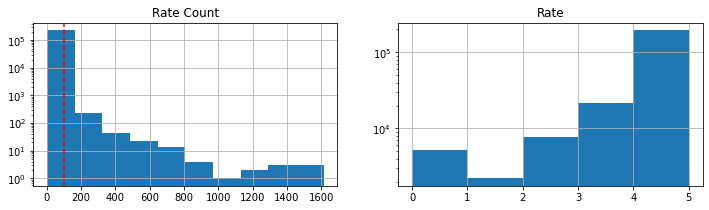

In [185]:
figure, axis = plt.subplots(1, 2, figsize=(12,3))

axis[0].hist(recipes_agmt['rate_count'])
axis[0].axvline(x=100,linestyle='--',color='r')
axis[0].set_yscale('log')
axis[0].set_title('Rate Count')
axis[0].grid()
axis[1].hist(recipes_agmt['rate'], bins=5)
axis[1].set_title('Rate')
axis[1].set_yscale('log')
axis[1].grid()

plt.show()

On décide de ne prendre en compte seulement les recettes avec plus de 100 notes

Exemple de recommandations par note 

In [186]:
best_recipes = recipes_agmt[recipes_agmt['rate_count'] > 100].sort_values('rate', ascending=False)
best_recipes[['name','rate']].head(10)

,name,rate
224586,mexican stack up rsc,4.990783
23999,brown sugar bundt cake,4.915254
53087,monterey chicken rolls,4.865672
58291,sweet creamy coleslaw,4.848921
120377,linda s cheesecake stuffed strawberries,4.847328
21497,spiced sweet roasted red pepper feta hummus,4.846154
42195,individual cream cheese danish,4.844444
61037,easy festive chocolate holiday pretzels,4.836066
4556,master brine recipe for meats,4.818182
43438,kittencal s beef or pork marinade and tenderizer,4.814159


Exemple de recommandations par note IMDB

In [187]:
m = 50
c = recipes_agmt.rate.mean()

def imdb_score(x):
    v = x['rate_count']
    r= x['rate']
    return (v/(v+m) * r) + (m/(m+v) * c)

recipes_agmt['rate_imdb'] = recipes_agmt.apply(imdb_score, axis=1)
best_recipes = recipes_agmt[recipes_agmt['rate_count'] > 100].sort_values('rate_imdb', ascending=False)
best_recipes[['name','rate_imdb']].head(10)

,name,rate_imdb
224586,mexican stack up rsc,4.870084
23999,brown sugar bundt cake,4.745907
53087,monterey chicken rolls,4.724523
58291,sweet creamy coleslaw,4.715938
13495,tiny cinnamon rolls,4.711396
3234,wholly guacamole,4.710668
42195,individual cream cheese danish,4.709796
120377,linda s cheesecake stuffed strawberries,4.708908
50516,kittencal s extreme chocolate brownies,4.708846
68183,kittencal s famous caesar salad,4.708412


### Recommendations par étapes

On extrait les 10 000 recettes ayant un rate imdb élevé

In [215]:
MAX_NB_RECIPES = 10000
subset_steps = recipes_agmt.dropna(subset=['steps']).sort_values('rate_imdb', ascending=False)[:MAX_NB_RECIPES]

In [216]:
from nltk import word_tokenize          
from nltk.stem import SnowballStemmer
import nltk
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')
# Download stopwords list

stop_words = set(stopwords.words('english')) 

# Interface lemma tokenizer from nltk with sklearn
class StemTokenizer:
    ignore_tokens = [',','\'', '.', ';', ':', '"', '``', "''", '`',']','[']
    def __init__(self):
        self.stemmer = SnowballStemmer('english')
    def __call__(self, doc):
        return [self.stemmer.stem(t) for t in word_tokenize(doc) if t not in self.ignore_tokens]

tokenizer=StemTokenizer()

[nltk_data] Downloading package punkt to /home/jsalvado/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jsalvado/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [217]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_distances

# Lemmatize the stop words
token_stop = tokenizer(' '.join(stop_words))

# Create TF-idf model
tfidf = TfidfVectorizer(stop_words=token_stop, tokenizer=tokenizer, max_features=4000)

#Construct the required TF-IDF matrix by fitting and transforming the recipes steps
tfidf_matrix = tfidf.fit_transform(subset_steps['steps'])

cosine_sim = cosine_distances(tfidf_matrix, tfidf_matrix)

In [218]:
names = subset_steps['name'].reset_index(drop=True)
indices = pd.Series(names.index, index=subset_steps['name'].reset_index(drop=True))

def get_reco(recipe_name, indices, sim_matrix):
  idx = indices[recipe_name]
  #print(f'original: {names}')
  recos = sim_matrix[idx].argsort()[1:6]
  recos = names.iloc[recos]
  return recos

Recommandation en fonction des étapes

In [219]:
name = names[np.random.randint(MAX_NB_RECIPES)]
recos = get_reco(name, indices, cosine_sim)

print('RECIPES NAMES : ', name, '\n')
print('RECOMMENDATIONS \n', recos)

RECIPES NAMES :  belgian meatloaf 

RECOMMENDATIONS 
 6713                              bethie s eggs
8340    sweet red pepper   mushroom quesadillas
6545                      taco macaroni skillet
5972                   roasted red pepper sauce
4163               garlic and thyme green beans
Name: name, dtype: object


### Recommendations par descriptions de la recette

On extrait les 10 000 recettes ayant un rate imdb élevé

In [220]:
MAX_NB_RECIPES = 10000
subset_desc = recipes_agmt.dropna(subset=['description']).sort_values('rate_imdb', ascending=False)[:MAX_NB_RECIPES]

In [221]:
# Lemmatize the stop words
token_stop = tokenizer(' '.join(stop_words))

# Create TF-idf model
tfidf = TfidfVectorizer(stop_words=token_stop, tokenizer=tokenizer, max_features=4000)

#Construct the required TF-IDF matrix by fitting and transforming the recipes steps
tfidf_matrix = tfidf.fit_transform(subset_desc.description)

cosine_sim = cosine_distances(tfidf_matrix, tfidf_matrix)

In [222]:
names = subset_desc['name'].reset_index(drop=True)
indices = pd.Series(names.index, index=subset_desc['name'].reset_index(drop=True))
print(names)

0                          mexican stack up  rsc
1                         brown sugar bundt cake
2                         monterey chicken rolls
3                         sweet  creamy coleslaw
4                                 mango salsa  1
                          ...                   
9995    pepperoni bread  using refrigerator loaf
9996                       exotic chicken kebabs
9997                            tomato treat   3
9998        chicken with shitakes and artichokes
9999              herbed trout with lemon butter
Name: name, Length: 10000, dtype: object


Recommandation en fonction des étapes

In [223]:
name = names[np.random.randint(MAX_NB_RECIPES)]
recos = get_reco(name, indices, cosine_sim)

print('RECIPES NAMES : ', name, '\n')
print('RECOMMENDATIONS \n', recos)

RECIPES NAMES :  gatorbek s cuban pork  black beans  and yellow rice 

RECOMMENDATIONS 
 2606            imitation crab  surimi  and avocado salad
4391                                   tex mex pork chops
6766    white corn on the cob seasoned with chipotle p...
8148                                   quick spanish rice
7732                roasted red bell pepper   tomato soup
Name: name, dtype: object


## Conclusion

En se basant sur la cosine distance on remarque que la plupart des recommendations sont faites en fonctions des aliments présent dans la recette. 
